<a href="https://colab.research.google.com/github/mhasnain1727/Login_page/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Submitted by **MOHD HASNAIN**

# > The Sparks Foundation  **#GRIPJUNE21**

Data Science & Business Analytics Tasks



TASK 1: Predict the percentage of an student based on the no. of study hours

**STEP 1:** Import all the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

**STEP 2:** Read data from csv file and visualise

In [5]:
data= pd.read_csv("http://bit.ly/w-data")

In [6]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#check for null value
data.isnull == True 

False

In [14]:
data.shape

(25, 2)

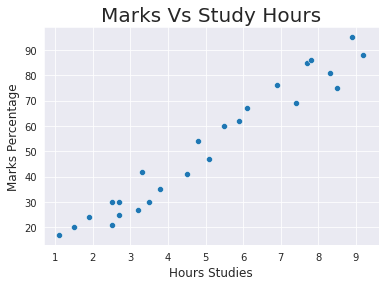

In [10]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studies', size=12)
plt.show()

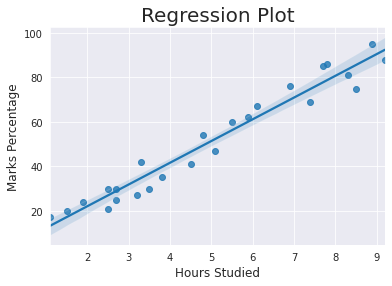

In [11]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [12]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


**STEP 3:** Prepare data for Machine learning algorithms and train the algorithm.

In [15]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [16]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [25]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 0)

train_X.shape, train_Y.shape, val_X.shape, val_Y.shape

((18, 1), (18,), (7, 1), (7,))

**STEP 4:** Making prediction.

In [26]:
regression = LinearRegression()
regression.fit(train_X, train_Y)

print("********* Model Trained *********")
pred_Y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_Y]})
print(prediction)

********* Model Trained *********
   Hours  Predicted Marks
0    1.5        16.844722
1    3.2        33.745575
2    7.4        75.500624
3    2.5        26.786400
4    5.9        60.588106
5    3.8        39.710582
6    1.9        20.821393


**STEP 5:** Compare Predicted values with actual values.

In [28]:
#Now here we comapre Actual Marks and Predicted Marks
compare_scores = pd.DataFrame({'Actual Marks': val_Y, 'Predicted Marks': pred_Y})
print(compare_scores)

   Actual Marks  Predicted Marks
0            20        16.844722
1            27        33.745575
2            69        75.500624
3            30        26.786400
4            62        60.588106
5            35        39.710582
6            24        20.821393


**STEP 6:** Evaluating the Model.

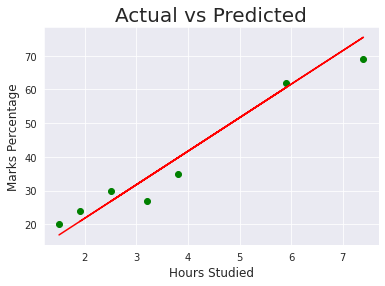

In [31]:
plt.scatter(x=val_X, y=val_Y, color='green')
plt.plot(val_X, pred_Y, color='red')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [32]:
#Now compute the mean absolute error
print('Mean absolute error: ',mean_absolute_error(val_Y,pred_Y))

Mean absolute error:  4.130879918502482


**STEP 7:** Result

In [33]:
hours = [9.25]
result = regression.predict([hours])
print("Score = {}".format(round(result[0],3)))

Score = 93.893
